In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pip install matplotlib pandas

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Gold Futures Historical Data.csv')
df = df[['Price', 'Date']]
# Flip the column
df = df.iloc[::-1]

# Drop missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

In [5]:
# Convert the 'Price' column to numeric, removing commas
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

# Calculate the statistical metrics for each relevant column
metrics = {
    "Mean": df["Price"].mean(),
    "Median": df["Price"].median(),
    "Mode": df["Price"].mode().iloc[0],  # Lấy giá trị đầu tiên trong trường hợp có nhiều mode
    "Range": df["Price"].max() - df["Price"].min(),
    "Variance": df["Price"].var(),
    "Standard Deviation": df["Price"].std()
}

In [6]:
# Convert the dictionary to a DataFrame for display
metrics_df = pd.DataFrame([metrics])


In [7]:
# Set display options to prevent line breaks in the output
pd.set_option('display.width', 1000)        # Set the display width to a large enough value
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed


print(metrics_df)

          Mean  Median    Mode   Range      Variance  Standard Deviation
0  1928.577193  1869.2  1650.0  1321.4  60082.295106          245.116901


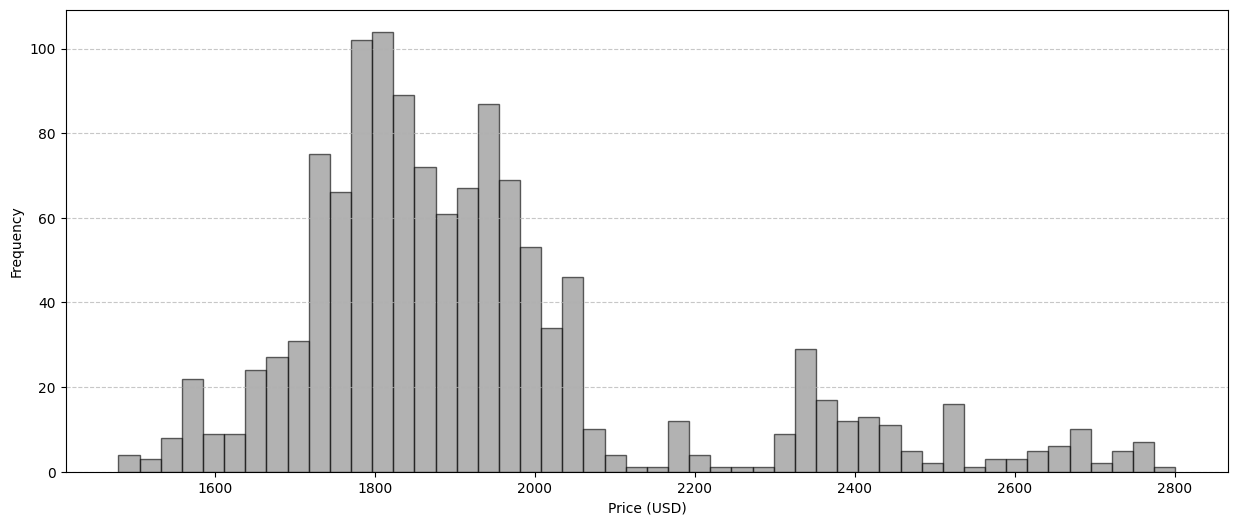

In [8]:
# Plotting a histogram of silver prices over time using the "Price" column
plt.figure(figsize=(15, 6))
plt.hist(df["Price"], bins=50, edgecolor="black", alpha=0.6, color="grey")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


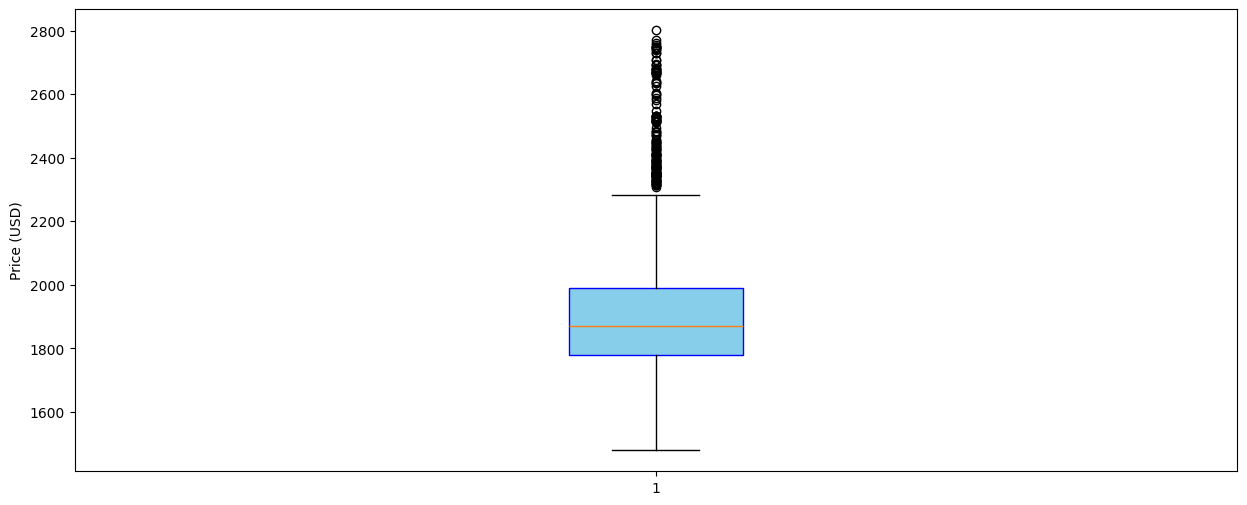

In [9]:
plt.figure(figsize=(15, 6))
data = df['Price']
plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
plt.ylabel('Price (USD)')
plt.show()


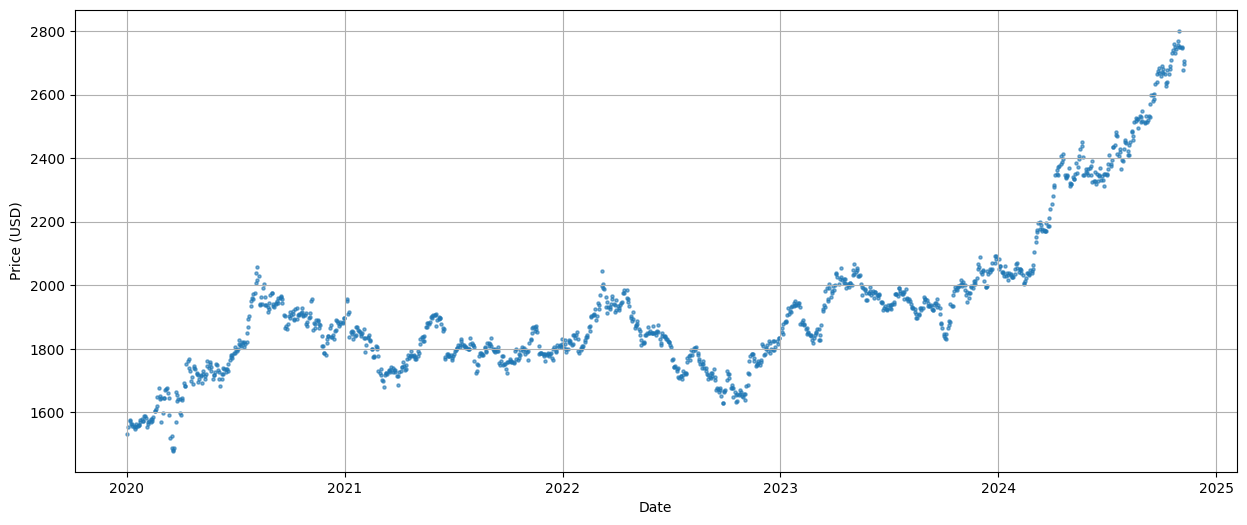

In [10]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the scatter plot, using 'Price'
plt.figure(figsize=(15, 6))
plt.scatter(df['Date'], df['Price'], s=5, alpha=0.6)  # Using 'Price' column
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()